In [ ]:
#IMPORT THE NECESSARY LIBRARIES

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as py
import seaborn as sns

import matplotlib.ticker as mtick
plt.style.use('fivethirtyeight')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import  ExtraTreesRegressor
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
#here reading using engine python as by normal method i get parse error on particular row so cant read data...
infile = "/zomato.csv"
#df = pd.read_csv(infile,error_bad_lines=False, engine="python")
df = pd.read_csv(infile)
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [ ]:
df.dtypes #checking the data types


url                            object
address                        object
name                           object
online_order                   object
book_table                     object
rate                           object
votes                           int64
phone                          object
location                       object
rest_type                      object
dish_liked                     object
cuisines                       object
approx_cost(for two people)    object
reviews_list                   object
menu_item                      object
listed_in(type)                object
listed_in(city)                object
dtype: object

In [ ]:
df.shape

(51717, 17)

In [ ]:
df.isna().sum() #Checking null values

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

In [ ]:
#Deleting Unnnecessary Columns
 #Dropping the column like "phone" and "url" 
df=df.drop(['url','phone'],axis=1)

In [ ]:
#Checking for duplicate values

df.duplicated().sum() 



43

In [ ]:
#incase dupicate found use below line to drop it 
df.drop_duplicates(inplace=True)
df.duplicated().sum() 

0

In [ ]:
#Remove the NaN values from the dataset
df.dropna(how='any',inplace=True)
df.isnull().sum()

address                        0
name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [ ]:
#Renaming columes appropriately
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type',
                                  'listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city'],
      dtype='object')

In [ ]:
#cleaning dataset
df['cost'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '750', '200', '850', '1,200', '150', '350', '250', '1,500',
       '1,300', '1,000', '100', '900', '1,100', '1,600', '950', '230',
       '1,700', '1,400', '1,350', '2,200', '2,000', '1,800', '1,900',
       '180', '330', '2,500', '2,100', '3,000', '2,800', '3,400', '40',
       '1,250', '3,500', '4,000', '2,400', '1,450', '3,200', '6,000',
       '1,050', '4,100', '2,300', '120', '2,600', '5,000', '3,700',
       '1,650', '2,700', '4,500'], dtype=object)

In [ ]:
#zomato['cost'] = zomato['cost'].astype(float) #Changing the cost to float
df['cost'] = df['cost'].apply(lambda x: x.replace(',','')) #Using lambda function to replace ',' from cost

df['cost'] = df['cost'].astype(float)

In [ ]:
print(df['cost'].unique())

print('---'*10)

df.dtypes

[ 800.  300.  600.  700.  550.  500.  450.  650.  400.  750.  200.  850.
 1200.  150.  350.  250. 1500. 1300. 1000.  100.  900. 1100. 1600.  950.
  230. 1700. 1400. 1350. 2200. 2000. 1800. 1900.  180.  330. 2500. 2100.
 3000. 2800. 3400.   40. 1250. 3500. 4000. 2400. 1450. 3200. 6000. 1050.
 4100. 2300.  120. 2600. 5000. 3700. 1650. 2700. 4500.]
------------------------------


address          object
name             object
online_order     object
book_table       object
rate             object
votes             int64
location         object
rest_type        object
dish_liked       object
cuisines         object
cost            float64
reviews_list     object
menu_item        object
type             object
city             object
dtype: object

In [ ]:
#Reading uninque values from the Rate column
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', 'NEW', '2.4/5', '2.2/5', '2.3/5',
       '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5',
       '2.7 /5', '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5',
       '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5',
       '3.3 /5', '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5',
       '3.5 /5', '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
#getting rid of "NEW"
df = df.loc[df.rate !='NEW'] 
df['rate'].unique()


array(['4.1/5', '3.8/5', '3.7/5', '4.6/5', '4.0/5', '4.2/5', '3.9/5',
       '3.0/5', '3.6/5', '2.8/5', '4.4/5', '3.1/5', '4.3/5', '2.6/5',
       '3.3/5', '3.5/5', '3.8 /5', '3.2/5', '4.5/5', '2.5/5', '2.9/5',
       '3.4/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5', '4.8/5',
       '3.9 /5', '4.2 /5', '4.0 /5', '4.1 /5', '2.9 /5', '2.7 /5',
       '2.5 /5', '2.6 /5', '4.5 /5', '4.3 /5', '3.7 /5', '4.4 /5',
       '4.9/5', '2.1/5', '2.0/5', '1.8/5', '3.4 /5', '3.6 /5', '3.3 /5',
       '4.6 /5', '4.9 /5', '3.2 /5', '3.0 /5', '2.8 /5', '3.5 /5',
       '3.1 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5', '2.1 /5',
       '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [ ]:
#Removing '/5' from Rates

df['rate'] = df['rate'].apply(lambda x: x.replace('/5',''))

In [ ]:
df['rate'] = df['rate'].astype(float)

In [ ]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [ ]:
df['rest_type'].value_counts()

Casual Dining                7326
Quick Bites                  5250
Cafe                         2375
Dessert Parlor               1083
Casual Dining, Bar            985
                             ... 
Bar, Pub                        5
Club, Casual Dining             4
Dessert Parlor, Kiosk           2
Dhaba                           1
Food Court, Casual Dining       1
Name: rest_type, Length: 73, dtype: int64

In [ ]:
rest=df.groupby('name').agg({'votes':'sum','cost':'mean','rate':'mean'}).reset_index()
rest

,name,votes,cost,rate
0,#L-81 Cafe,432,400.000000,3.900000
1,#refuel,111,400.000000,3.700000
2,1000 B.C,294,300.000000,3.200000
3,100ÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ°C,123,450.000000,3.700000
4,1131 Bar + Kitchen,16938,1500.000000,4.500000
...,...,...,...,...
3152,b CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃ...,1287,3400.000000,4.300000
3153,eat.fit,30318,468.181818,4.418182
3154,i-Bar - The Park Bangalore,6817,3000.000000,3.800000
3155,nu.tree,1443,400.000000,4.314286


In [ ]:
## ANALYSING BEST BUDGET RESTAURANTS...
#1 Best budget restaurants in any location
def return_budget(location,restaurant_type):
    filter=(df['cost']<=400) & (df['location']==location) & (df['rate']>=4) & (df['rest_type']==restaurant_type)
    budget=df[filter]
    return (budget['name'].unique())

In [ ]:
return_budget('Brigade Road','Quick Bites')

array(['Hotel Ramprasad', "Yak's Kitchen", 'Taste Of Tibet'], dtype=object)

In [ ]:
# there are total 93 unique locations
locations=pd.DataFrame({'Name':df['location'].unique()})  # converting it into data frame specifically for location
locations

,Name
0,Banashankari
1,Basavanagudi
2,Jayanagar
3,Kumaraswamy Layout
4,Rajarajeshwari Nagar
...,...
83,Sahakara Nagar
84,Jalahalli
85,Yelahanka
86,Magadi Road


In [ ]:
#2 where exactly most of the restaurants are situated
# for each location, there is count of the no. of restaurants

Rest_locations=pd.DataFrame(df['location'].value_counts().reset_index())  #Rest_type data frame 
Rest_locations.columns=['Name','count']  # changing the column/feature name
Rest_locations.head()



,Name,count
0,Koramangala 5th Block,1776
1,BTM,1472
2,Indiranagar,1355
3,HSR,1170
4,Jayanagar,1060


In [ ]:
# merging both the data frames on the basis of common (feature i.e; name) to get the total no. of restaurants at each location
Restaurant_locations=Rest_locations.merge(locations,on='Name',how="left").dropna()  # used for spatial analysis
Restaurant_locations.head()

,Name,count
0,Koramangala 5th Block,1776
1,BTM,1472
2,Indiranagar,1355
3,HSR,1170
4,Jayanagar,1060


In [ ]:
## ANALYSING REVIEW OF RESTAURANT
#1 Analyze review of particular restaurant

# fetch the data of review_list column
# cleaning the data (removing special characters, extra spaces, repeated words)
# store the data in a word cloud
# display the wordcloud of reviews

# fetch the data of review_list column
df['reviews_list'][0]
data=df['reviews_list'][0].lower()
data



'[(\'rated 4.0\', \'rated\\n  a beautiful place to dine in.the interiors take you back to the mughal era. the lightings are just perfect.we went there on the occasion of christmas and so they had only limited items available. but the taste and service was not compromised at all.the only complaint is that the breads could have been better.would surely like to come here again.\'), (\'rated 4.0\', \'rated\\n  i was here for dinner with my family on a weekday. the restaurant was completely empty. ambience is good with some good old hindi music. seating arrangement are good too. we ordered masala papad, panner and baby corn starters, lemon and corrionder soup, butter roti, olive and chilli paratha. food was fresh and good, service is good too. good for family hangout.\\ncheers\'), (\'rated 2.0\', \'rated\\n  its a restaurant near to banashankari bda. me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet. on inquiring they said this plac

In [ ]:
# cleaning the data (removing special characters) using substitute function of regular expression module
import re  
data2=re.sub('[^a-zA-Z]', ' ',data)  # except words...replace other things with white space
data2

# cleaning the data (removing repeated words)
data3=re.sub('repeat', ' ',data2)
data3

# cleaning the data (removing repeated characters)
data4=re.sub('x', ' ', data3)
data4

# cleaning the data (removing extra white spaces)
data5=re.sub(' +',' ',data4)
data5

' rated rated n a beautiful place to dine in the interiors take you back to the mughal era the lightings are just perfect we went there on the occasion of christmas and so they had only limited items available but the taste and service was not compromised at all the only complaint is that the breads could have been better would surely like to come here again rated rated n i was here for dinner with my family on a weekday the restaurant was completely empty ambience is good with some good old hindi music seating arrangement are good too we ordered masala papad panner and baby corn starters lemon and corrionder soup butter roti olive and chilli paratha food was fresh and good service is good too good for family hangout ncheers rated rated n its a restaurant near to banashankari bda me along with few of my office friends visited to have buffet but unfortunately they only provide veg buffet on inquiring they said this place is mostly visited by vegetarians anyways we ordered ala carte item

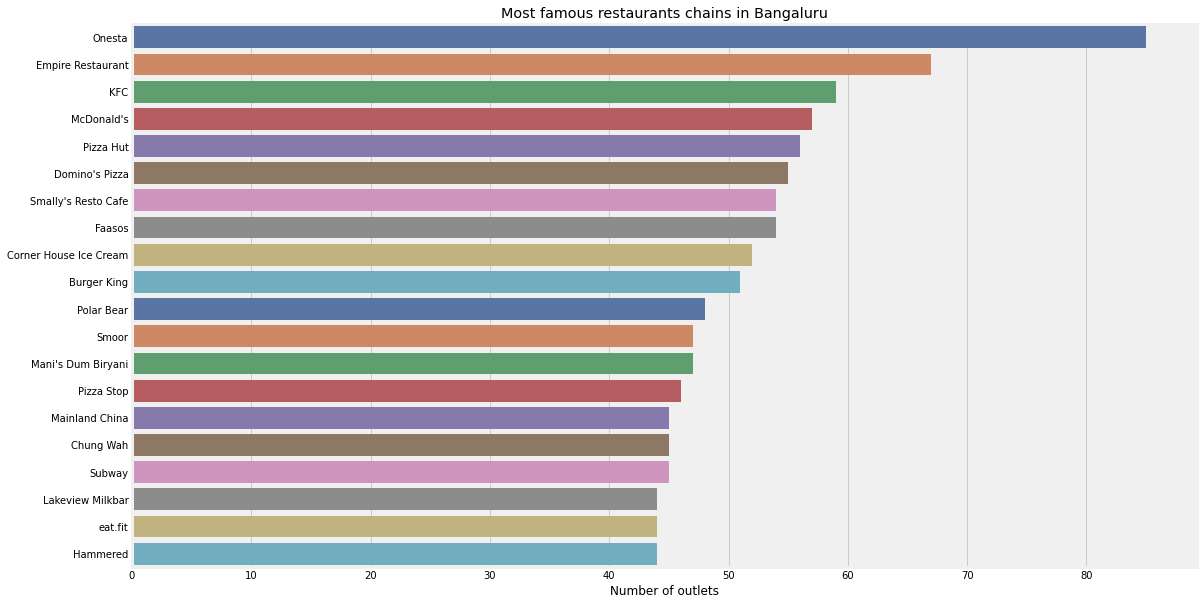

In [ ]:
#Most famous restaurants chains in Bangaluru

plt.figure(figsize=(17,10))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='deep')
plt.title("Most famous restaurants chains in Bangaluru")
plt.xlabel("Number of outlets")
plt.show()



In [ ]:
#Whether restaurant offer Table booking or not

x=df['book_table'].value_counts()
colors = ['#800080', '#0000A0']

trace=go.Pie(labels=x.index,values=x,textinfo="value",
            marker=dict(colors=colors, 
                           line=dict(color='#001000', width=2)))
layout=go.Layout(title="Table booking",width=300,height=300)
fig=go.Figure(data=[trace],layout=layout)
py.iplot(fig, filename='pie_chart_subplots')



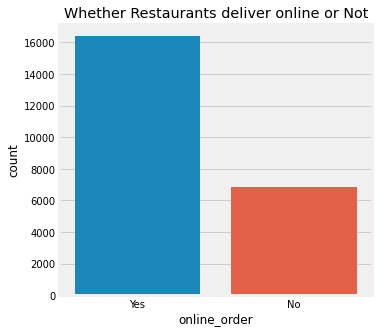

In [ ]:

#Restaurants delivering Online or not
sns.countplot(df['online_order'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Whether Restaurants deliver online or Not')
plt.show()



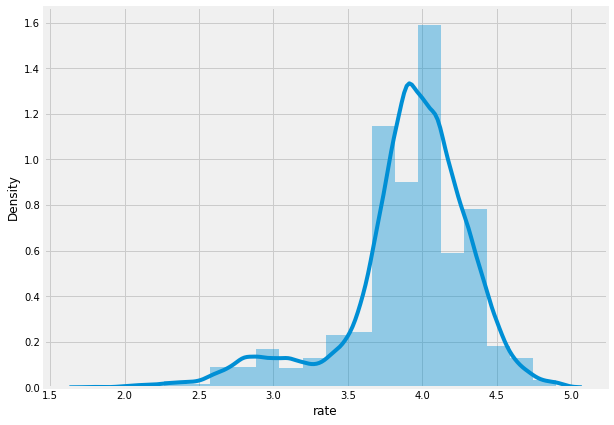

In [ ]:
#How ratings are distributed
plt.figure(figsize=(9,7))

sns.distplot(df['rate'],bins=20)

In [ ]:
#Count of ratings as between "1 and 2", "2 and 3", "3 and 4", and "4 and 5"

df['rate'].unique()

array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [ ]:
df['rate'].min()

1.8

In [ ]:
((df['rate']>2) & (df['rate']<3)).sum()

1168

In [ ]:
((df['rate']>=4) & (df['rate']<5)).sum()

11911

Text(0.5, 1.0, 'Type of Service')

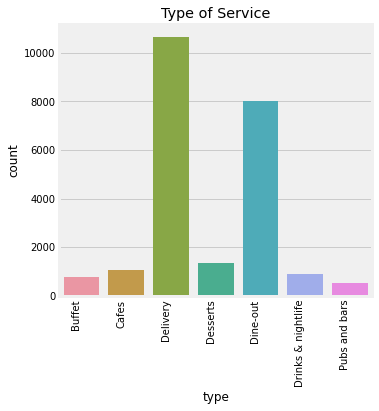

In [ ]:
#Types of Services

sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(), rotation=90, ha="right")
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Type of Service')

In [ ]:

#Distribution of Cost of Food for two People

from plotly.offline import iplot

trace0=go.Box(y=df['cost'], name="accepting online orders", marker = dict( color = 'rgb(113, 10, 100)'))
data=[trace0]
layout=go.Layout(title="Box plot of approximate cost",width=300,height=300,yaxis=dict(title="Price"))
fig=go.Figure(data=data,layout=layout)
py.iplot(fig)



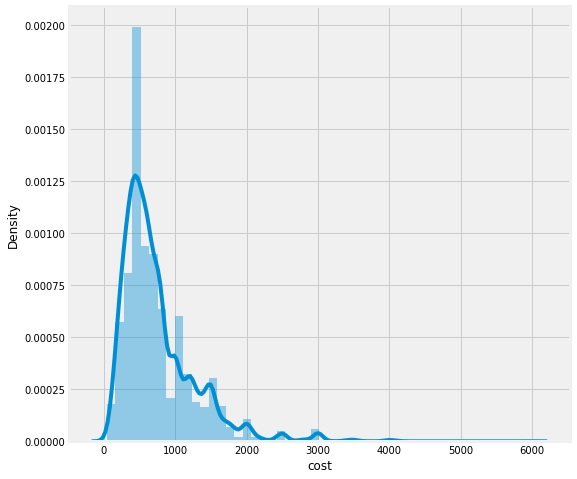

In [ ]:
#Distribution of charges

plt.figure(figsize=(8,8))
sns.distplot(df['cost'])
plt.show()

In [ ]:
#re=regular expression (use for splitting words)

import re

df.index=range(df.shape[0])
likes=[]
for i in range(df.shape[0]):
    array_split=re.split(',',df['dish_liked'][i])
    for item in array_split:
        likes.append(item)

In [ ]:
df.index=range(df.shape[0])

In [ ]:
df.index

RangeIndex(start=0, stop=23248, step=1)

In [ ]:
print("Count of Most liked dishes in Bangalore")
favourite_food = pd.Series(likes).value_counts()
favourite_food.head(30)

Count of Most liked dishes in Bangalore


 Pasta              2692
 Pizza              1915
 Cocktails          1880
 Burgers            1736
 Mocktails          1623
 Biryani            1307
 Sandwiches         1287
Burgers             1256
 Coffee             1184
 Nachos             1170
 Fish               1116
 Paratha            1107
 Salads             1055
 Chicken Biryani    1004
Cocktails            891
 Fries               876
 Noodles             854
 Beer                835
 Mutton Biryani      832
 Tea                 819
Coffee               801
 Sandwich            788
 Butter Chicken      782
 Thali               770
Biryani              749
Pizza                747
 Roti                729
 Brownie             726
 Salad               677
 Hot Chocolate       672
dtype: int64

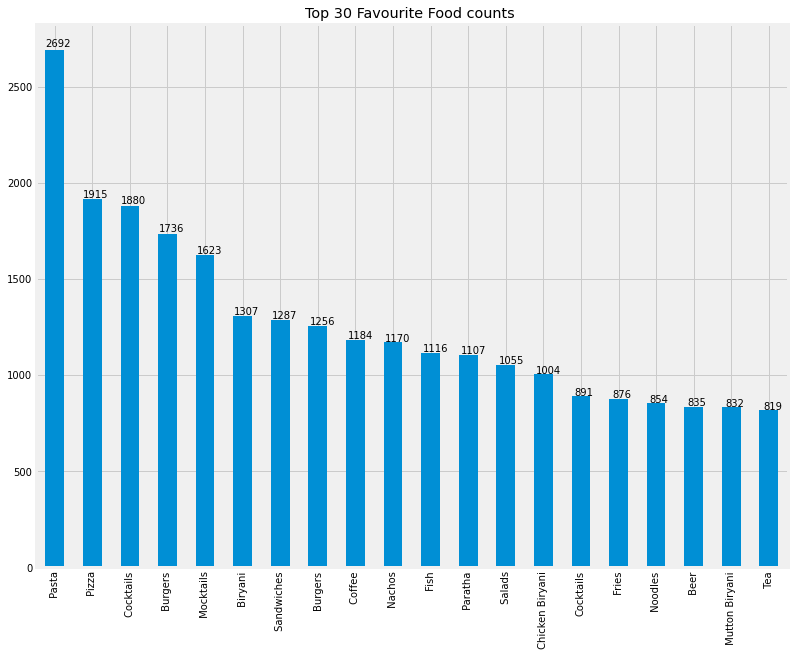

In [ ]:
ax = favourite_food.nlargest(n=20, keep='first').plot(kind='bar',figsize=(12,10),title = 'Top 30 Favourite Food counts ')

for i in ax.patches:
    ax.annotate(str(i.get_height()), (i.get_x() * 1.005, i.get_height() * 1.005))

Text(0.5, 0, 'count')

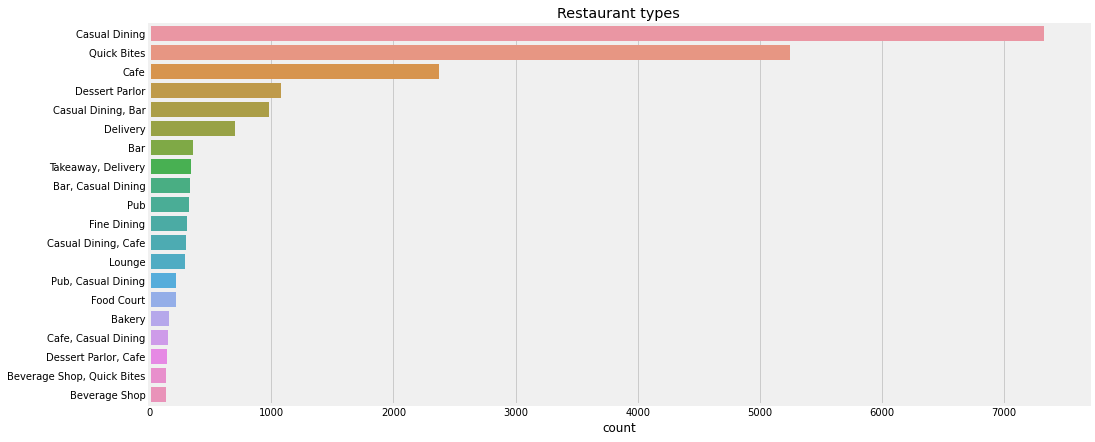

In [ ]:
#Restaurant and their counts

plt.figure(figsize=(15,7))
rest=df['rest_type'].value_counts()[:20]
sns.barplot(rest,rest.index)
plt.title("Restaurant types")
plt.xlabel("count")

In [ ]:
###MACHINE LEARNING 
##decision tree based on rating of a restaurant i.e automatic rating for future values found

In [ ]:
#Convert the online 'categorical variables' into a numeric format

df.online_order[df.online_order == 'Yes'] = 1 
df.online_order[df.online_order == 'No'] = 0

In [ ]:
df.online_order.value_counts()

1    2072
0     787
Name: online_order, dtype: int64

In [ ]:
df.online_order = pd.to_numeric(df.online_order)

In [ ]:
#change the string categorical into to a  int i.e numeric format
df.book_table[df.book_table == 'Yes'] = 1 
df.book_table[df.book_table == 'No'] = 0

df.book_table = pd.to_numeric(df.book_table)

df.book_table.value_counts()



0    2218
1     641
Name: book_table, dtype: int64

In [ ]:
#Label encode the categorical variables to make it easier to build algorithm

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df.location = le.fit_transform(df.location)
df.rest_type = le.fit_transform(df.rest_type)
df.cuisines = le.fit_transform(df.cuisines)
df.menu_item = le.fit_transform(df.menu_item)

In [ ]:
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,1,1,4.1,775,1,16,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...",619,800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",551,Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,1,0,4.1,787,1,16,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...",275,800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",551,Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,1,0,3.8,918,1,13,"Churros, Cannelloni, Minestrone Soup, Hot Choc...",237,800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",551,Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,0,0,3.7,88,1,49,Masala Dosa,720,300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",551,Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,0,0,3.8,166,3,16,"Panipuri, Gol Gappe",629,600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",551,Buffet,Banashankari


In [ ]:
#STEP 1 initialize x and y
x = df.iloc[:,[2,3,5,6,7,9,10,12]]
x.head()

,online_order,book_table,votes,location,rest_type,cuisines,cost,menu_item
0,1,1,775,1,16,619,800.0,551
1,1,0,787,1,16,275,800.0,551
2,1,0,918,1,13,237,800.0,551
3,0,0,88,1,49,720,300.0,551
4,0,0,166,3,16,629,600.0,551


In [ ]:
y = df['rate']
y

0       4.1
1       4.1
2       3.8
3       3.7
4       3.8
       ... 
2854    4.5
2855    4.5
2856    4.4
2857    4.2
2858    4.3
Name: rate, Length: 2859, dtype: float64

In [ ]:
#STEP 2 -split train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.3,random_state=10)

In [ ]:
#Linear Regression 

lr_model=LinearRegression()
lr_model.fit(x_train,y_train)


LinearRegression()

In [ ]:
#predicting test results 
from sklearn.metrics import r2_score
y_pred=lr_model.predict(x_test)
r2_score(y_test,y_pred)

0.20012049218132388

In [ ]:
#Random Forest

#from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor
RF_Model=RandomForestRegressor(n_estimators=650,random_state=245,min_samples_leaf=.0001)
RF_Model.fit(x_train,y_train)
y_predict=RF_Model.predict(x_test)   #predicting just test set output here 
r2_score(y_test,y_predict)



0.6209932222874577

In [ ]:
#predicting random forest using new input
RF_Model.predict([[1,0,250,1,5,25,700.0,11]])

array([4.03923077])

In [ ]:
#ExtraTree Regressor

#Preparing Extra Tree Regression
from sklearn.ensemble import  ExtraTreesRegressor
ET_Model=ExtraTreesRegressor(n_estimators = 120)
ET_Model.fit(x_train,y_train)
y_predict=ET_Model.predict(x_test)


from sklearn.metrics import r2_score
r2_score(y_test,y_predict)



0.6771967181435903

In [ ]:
#### TASK -1  PREDICTING THE RATINGS OF NEW RESTAURANT BASED ON DECISION TREE 

In [ ]:
#decision tree regression
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state = 0)
regressor.fit(x, y)

DecisionTreeRegressor(random_state=0)

In [ ]:
#predicting new result--input is given by me (8 input here ) and it finds the new y i.e ratings here 
regressor.predict([[1,0,250,1,5,25,700.0,11]])

array([4.2])

In [ ]:
from sklearn.metrics import accuracy_score
    print(accuracy_score(predict,y_test))
    print('\n')

In [ ]:
#### TASK -2   classification models

In [ ]:
## PREPARING THE DATA FOR MODELLING PURPOSE
#1 preparing the data for ML modelling
#2 create target variable

# Imbalance data --outliers cause imbalance data
# outliers -- large deviations in the values of training data which causes less accurate models and poor results
# --if a data is trained w.r.t any ML algo and consist of outliers; 
# --then if new data is to be predicted on the basis of trained data, it will give poor and less accurate results.



In [ ]:
# splitting the data in two parts;
# 1st for the new restaurants-- rating--0
# 2nd for training purpose-- rating>0 for ML model

# created a function which distinguish between new restaurants and the restaurants that are already rated(for ML --training)
def assign(x):
    if x>0:
        return 1  # for training
    else:
        return 0  # for new restaurants
df['rated']=df['rate'].apply(assign)



In [ ]:
# splitting the data frames
new_restaurants = df[df['rated'] == 0]
train_val_restaurants = df.query('rated == 1')



In [ ]:
train_val_restaurants.head()  # this is the entire data frame required for the training

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city,rated
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,1
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,1
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,1
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,1
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,1


In [ ]:
#2 Create a target variable --on the basis of which prediction is done...

train_val_restaurants['rate'].unique()  # on the basis of which target varible is created



array([4.1, 3.8, 3.7, 4.6, 4. , 4.2, 3.9, 3. , 3.6, 2.8, 4.4, 3.1, 4.3,
       2.6, 3.3, 3.5, 3.2, 4.5, 2.5, 2.9, 3.4, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [ ]:
# By now we've already splitted our original data into new_restaurants and train_val_restaurants using pandas DataFrames.
# The main point here is to define a fair threshold(rating) for splitting the restaurants into good and bad ones.
# Taking 3.75 as the threshold value... Good restaurants>=3.75 rating ; Bad restaurants<3.75 rating
# Defining a custom threshold for splitting restaurants into good and bad ; storing in new column 'target'
# Good restaurants-1
# Bad restaurants-0
threshold = 3.75
train_val_restaurants['target'] = train_val_restaurants['rate'].apply(lambda x: 1 if x >= threshold else 0)

In [ ]:
train_val_restaurants.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,cost,reviews_list,menu_item,type,city,rated,target
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800.0,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari,1,1
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800.0,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari,1,1
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800.0,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari,1,1
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300.0,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari,1,0
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600.0,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari,1,1


In [ ]:
import plotly.graph_objs as go
from plotly.offline import iplot
x=train_val_restaurants['target'].value_counts()  # to check if there is imbalance data or not (outliers)
labels=['Good Restaurants(1)','Bad Restaurants(0)']
print(x)
trace=go.Pie(labels=labels,values=x,hoverinfo='label+percent',textinfo='percent',textfont=dict(size=25),
              pull=[0, 0, 0,0.2, 0])
iplot([trace])

1    17640
0     5608
Name: target, dtype: int64


In [ ]:
## PERFORM FEATURE IMPORTANCE/EXTRACTION ON DATA

# Define the features to be used on training. (important features)
# Here we will take a look at the raw data to select valuable features and apply some steps to create another ones.

# the main idea is to get the length of the list of cuisine and rest_type feature so that we can create a new column.
def count(x):
    return len(x.split(','))



In [ ]:
# as it have some NAN values, that's why very firstly; have to convert into str  &  then apply count function
train_val_restaurants['total_cuisines']=train_val_restaurants['cuisines'].astype(str).apply(count)
train_val_restaurants['multiple_types']=train_val_restaurants['rest_type'].astype(str).apply(count)

# from these features, will choose the important features which will play important role in the prediction
train_val_restaurants.columns



Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'dish_liked', 'cuisines', 'cost',
       'reviews_list', 'menu_item', 'type', 'city', 'rated', 'target',
       'total_cuisines', 'multiple_types'],
      dtype='object')

In [ ]:
# important features...
imp_features=['online_order','book_table','location','rest_type',
              'multiple_types','total_cuisines','type', 
              'city','cost','target']

data = train_val_restaurants[imp_features]
data.head()



,online_order,book_table,location,rest_type,multiple_types,total_cuisines,type,city,cost,target
0,Yes,Yes,Banashankari,Casual Dining,1,3,Buffet,Banashankari,800.0,1
1,Yes,No,Banashankari,Casual Dining,1,3,Buffet,Banashankari,800.0,1
2,Yes,No,Banashankari,"Cafe, Casual Dining",2,3,Buffet,Banashankari,800.0,1
3,No,No,Banashankari,Quick Bites,1,2,Buffet,Banashankari,300.0,0
4,No,No,Basavanagudi,Casual Dining,1,2,Buffet,Banashankari,600.0,1


In [ ]:
#1 removing all the missing values
# checking how many missing values are there
data.isnull().sum()  

online_order      0
book_table        0
location          0
rest_type         0
multiple_types    0
total_cuisines    0
type              0
city              0
cost              0
target            0
dtype: int64

In [ ]:
#2 separate catagorical and numerical values (-- separate objects from int and float)
data.dtypes

online_order       object
book_table         object
location           object
rest_type          object
multiple_types      int64
total_cuisines      int64
type               object
city               object
cost              float64
target              int64
dtype: object

In [ ]:
cat_features=[col for col in data.columns if data[col].dtype=='O']  # if dtype is object, store it in a cat_features list
num_features=[col for col in data.columns if data[col].dtype!='O']  # if dtype is int/float, store it in a num_features list

In [ ]:
# for each cat_feature we found the total no. of unique values 
for feature in cat_features:
    print('{} has total {} unique features'.format(feature, data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 88 unique features
rest_type has total 73 unique features
type has total 7 unique features
city has total 30 unique features


In [ ]:
## PERFORM FEATURE ENCODING ON THE DATA
#1 reducing the unique no. of features
#2 feature encoding --converting catagorical values into numerical values

#1 reducing the unique no. of features
# checking the % contibution of each location --if contribution is greater than threshold, keeping them(imp) and rest as others.
# location and rest_type has max features; so reducing the less important ones

cols=['location','rest_type']
for col in cols:
    print('Total feature in {} are {}'.format(col,data[col].nunique()))



Total feature in location are 88
Total feature in rest_type are 73


In [ ]:
# for location, setting threshold=0.4 for selecting important, and less important to others.
values=data['location'].value_counts()/len(data)*100
values

threshold=0.4
imp=values[values>threshold]
imp

Koramangala 5th Block    7.639367
BTM                      6.331727
Indiranagar              5.828458
HSR                      5.032691
Jayanagar                4.559532
JP Nagar                 4.271335
Whitefield               3.578802
Koramangala 7th Block    3.165864
Koramangala 6th Block    3.122849
Marathahalli             2.929284
Koramangala 4th Block    2.804542
MG Road                  2.563661
Brigade Road             2.443221
Church Street            2.202340
Bannerghatta Road        2.142120
Ulsoor                   2.034584
Bellandur                2.025981
Kalyan Nagar             2.004474
Koramangala 1st Block    2.004474
Sarjapur Road            1.948555
Lavelle Road             1.909842
Residency Road           1.896937
Banashankari             1.664659
Malleshwaram             1.600138
Richmond Road            1.509807
Cunningham Road          1.428080
Electronic City          1.376462
Brookefield              1.320544
New BEL Road             1.316242
St. Marks Road

In [ ]:
# if value<threshold, assign it to others else keep the important ones
data['location']=np.where(data['location'].isin(imp.index),data['location'],'other')
data['location']

0        Banashankari
1        Banashankari
2        Banashankari
3        Banashankari
4        Basavanagudi
             ...     
23243      Whitefield
23244      Whitefield
23245      Whitefield
23246      Whitefield
23247           other
Name: location, Length: 23248, dtype: object

In [ ]:
# for rest_type, setting threshold=1.5 for selecting important, and less important to others.
values2=data['rest_type'].value_counts()/len(data)*100
values2

threshold=1.5
imp2=values2[values2>threshold]
imp2

Casual Dining         31.512388
Quick Bites           22.582588
Cafe                  10.215933
Dessert Parlor         4.658465
Casual Dining, Bar     4.236924
Delivery               3.028217
Bar                    1.539917
Name: rest_type, dtype: float64

In [ ]:
# if value<threshold, assign it to others else keep the important ones
data['rest_type']=np.where(data['rest_type'].isin(imp2.index),data['rest_type'],'other')
data['rest_type']

0             Casual Dining
1             Casual Dining
2                     other
3               Quick Bites
4             Casual Dining
                ...        
23243                 other
23244                 other
23245    Casual Dining, Bar
23246    Casual Dining, Bar
23247                   Bar
Name: rest_type, Length: 23248, dtype: object

In [ ]:
# after applying feature reduction, we will observe less number of features
for feature in cat_features:
    print('{} has total {} unique features'.format(feature, data[feature].nunique()))

online_order has total 2 unique features
book_table has total 2 unique features
location has total 45 unique features
rest_type has total 8 unique features
type has total 7 unique features
city has total 30 unique features


In [ ]:
#2 feature encoding --converting catagorical values into numerical values (ML works on numeric data)
# one-hot encoding 

cat_features



['online_order', 'book_table', 'location', 'rest_type', 'type', 'city']

In [ ]:
data_cat = data[cat_features]
for col in cat_features:
    col_encoded = pd.get_dummies(data_cat[col],prefix=col,drop_first=True)
    data_cat=pd.concat([data_cat,col_encoded],axis=1)
    data_cat.drop(col, axis=1, inplace=True)

data_cat.head()  # after applying feature encoding, all the data is converted into numerical values.



,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Bellandur,location_Brigade Road,location_Brookefield,location_Church Street,...,city_Lavelle Road,city_MG Road,city_Malleshwaram,city_Marathahalli,city_New BEL Road,city_Old Airport Road,city_Rajajinagar,city_Residency Road,city_Sarjapur Road,city_Whitefield
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
### PREPARE ENTIRE DATA FOR MODELLING
#1 concatenate both the datas numerical-catagorical data and numerical data
#2 Apply Random Forest on the data

data_final=pd.concat([data.loc[:,['multiple_types','total_cuisines','cost','target']],data_cat],axis=1)

data_final.head()



,multiple_types,total_cuisines,cost,target,online_order_Yes,book_table_Yes,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,...,city_Lavelle Road,city_MG Road,city_Malleshwaram,city_Marathahalli,city_New BEL Road,city_Old Airport Road,city_Rajajinagar,city_Residency Road,city_Sarjapur Road,city_Whitefield
0,1,3,800.0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,3,800.0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3,800.0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,2,300.0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,2,600.0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#STEP 1 INITIALIZE X AND Y 
X = data_final.drop('target', axis=1)  # independent data
y = data_final['target'].values  # dependent data (prediction)

data_final.shape



(23248, 92)

In [ ]:
#STEP 2 --split into train and test data
# 20% data is used for testing and 80% for training
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=42)

X_train.shape  # 80% data for training



(18598, 91)

In [ ]:
#2 Apply RANDOM FOREST (ensemble ML algo) on data
# Import the random forest model.
from sklearn.ensemble import RandomForestClassifier

# Initialize the model with some parameters.
model = RandomForestClassifier(n_estimators=100, min_samples_leaf=10, random_state=1)

# Fit the training data into the model.
model.fit(X_train, y_train)

# Make predictions.
predictions = model.predict(X_test)

In [ ]:
# Confusion matrix.
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(predictions, y_test)



array([[ 279,  115],
       [ 851, 3405]])

In [ ]:
#accuracy_score.
accuracy_score(predictions,y_test)

0.792258064516129

In [ ]:
#fit naive bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [ ]:
### classifier models
models = []
models.append(('LogisticRegression', LogisticRegression()))
models.append(('Naive Bayes',GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
models.append(('Decision Tree', DecisionTreeClassifier()))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))



In [ ]:
for name,model in models:
    print(name)
    print(models)

LogisticRegression
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
Naive Bayes
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
RandomForest
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
Decision Tree
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree', DecisionTreeClassifier()), ('KNN', KNeighborsClassifier())]
KNN
[('LogisticRegression', LogisticRegression()), ('Naive Bayes', GaussianNB()), ('RandomForest', RandomForestClassifier()), ('Decision Tree'

In [ ]:
# Make predictions on validation dataset

for name, model in models:
    print(name)
    model.fit(X_train, y_train)
    
    # Make predictions.
    predictions = model.predict(X_test)

    # Compute the error.
    from sklearn.metrics import confusion_matrix
    print(confusion_matrix(predictions, y_test))

    from sklearn.metrics import accuracy_score
    print(accuracy_score(predictions,y_test))
    print('\n')

LogisticRegression
[[ 231  174]
 [ 899 3346]]
0.769247311827957


Naive Bayes
[[ 783 1312]
 [ 347 2208]]
0.6432258064516129


RandomForest
[[ 667  283]
 [ 463 3237]]
0.8395698924731183


Decision Tree
[[ 878  305]
 [ 252 3215]]
0.8802150537634409


KNN
[[ 728  241]
 [ 402 3279]]
0.8617204301075269


